# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import plotly.express as px
import plotly.graph_objs as go

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



# **Load Dataset**

In [2]:
bankchurn = pd.read_csv('https://raw.githubusercontent.com/nicoardimas/Credit_Card_Customer_Churn/main/BankChurners.csv')
bankchurn = bankchurn.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
                          axis = 1)
bankchurn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# **Exploratory Data Analysist**

## **Information of Variables**

In [3]:
bankchurn.shape

(10127, 21)

In [4]:
bankchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## **Checking Missing Value & Invalid Data**



In [5]:
# Missing Value
bankchurn.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
# Invalid Data
for i in list(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']):
    print('Unique Values Count Variable', i)
    print(bankchurn[i].value_counts(), '\n')

Unique Values Count Variable Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64 

Unique Values Count Variable Gender
F    5358
M    4769
Name: Gender, dtype: int64 

Unique Values Count Variable Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64 

Unique Values Count Variable Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64 

Unique Values Count Variable Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64 

Unique Values Count Variable Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64 



## **Descriptive Statistics**

In [7]:
bankchurn.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [8]:
bankchurn.describe(include = 'O')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


## **Proportion of Target Class**

In [9]:
fig = px.pie(bankchurn, names = 'Attrition_Flag', title = 'Percentage of Existing and Attrited Customers', hole = 0.5)
fig.update_traces(textposition = 'inside', textinfo = 'percent + label')
fig.show()
print('Total number of customers:', bankchurn['Attrition_Flag'].count())
print(bankchurn['Attrition_Flag'].value_counts())

Total number of customers: 10127
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


## **Numerical Variables by Target**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



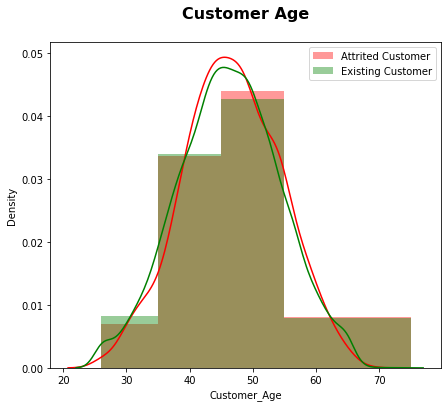

In [10]:
# Customer Age
plt.figure(figsize = (7, 6))
sns.distplot(bankchurn.Customer_Age[bankchurn.Attrition_Flag == 'Attrited Customer'], bins = [26, 35, 45, 55, 75], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Customer_Age[bankchurn.Attrition_Flag == 'Existing Customer'], bins = [26, 35, 45, 55, 75], color = 'g', label = 'Existing Customer')
plt.title('Customer Age\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



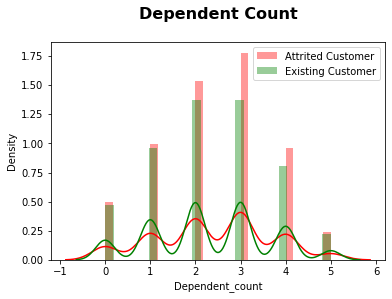

In [11]:
# Dependent_count
plt.figure()
sns.distplot(bankchurn.Dependent_count[bankchurn.Attrition_Flag == 'Attrited Customer'], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Dependent_count[bankchurn.Attrition_Flag == 'Existing Customer'], color = 'g', label = 'Existing Customer')
plt.title('Dependent Count\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



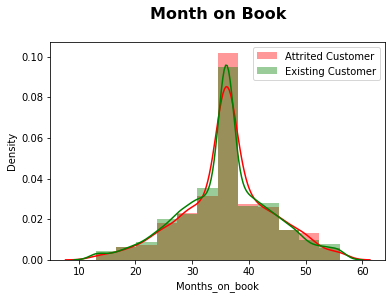

In [12]:
# Months_on_book
plt.figure()
sns.distplot(bankchurn.Months_on_book[bankchurn.Attrition_Flag == 'Attrited Customer'], bins = 12, color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Months_on_book[bankchurn.Attrition_Flag == 'Existing Customer'], bins = 12, color = 'g', label = 'Existing Customer')
plt.title('Month on Book\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



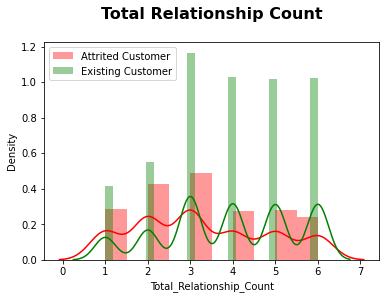

In [13]:
# Total_Relationship_Count
plt.figure()
sns.distplot(bankchurn.Total_Relationship_Count[bankchurn.Attrition_Flag == 'Attrited Customer'], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Total_Relationship_Count[bankchurn.Attrition_Flag == 'Existing Customer'], color = 'g', label = 'Existing Customer')
plt.title('Total Relationship Count\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



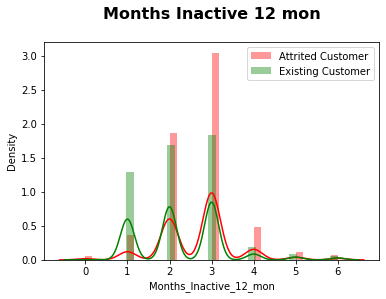

In [14]:
# Months_Inactive_12_mon
plt.figure()
sns.distplot(bankchurn.Months_Inactive_12_mon[bankchurn.Attrition_Flag == 'Attrited Customer'], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Months_Inactive_12_mon[bankchurn.Attrition_Flag == 'Existing Customer'], color = 'g', label = 'Existing Customer')
plt.title('Months Inactive 12 mon\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



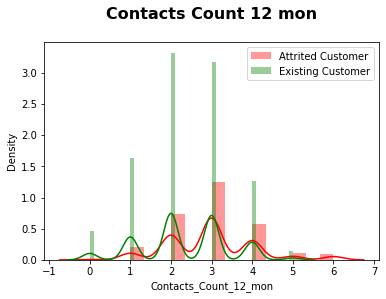

In [15]:
# Contacts_Count_12_mon
plt.figure()
sns.distplot(bankchurn.Contacts_Count_12_mon[bankchurn.Attrition_Flag == 'Attrited Customer'], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Contacts_Count_12_mon[bankchurn.Attrition_Flag == 'Existing Customer'], color = 'g', label = 'Existing Customer')
plt.title('Contacts Count 12 mon\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



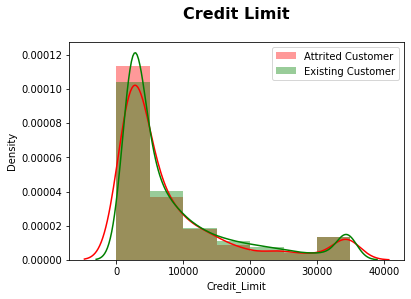

In [16]:
# Credit_Limit
plt.figure()
sns.distplot(bankchurn.Credit_Limit[bankchurn.Attrition_Flag == 'Attrited Customer'], bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Credit_Limit[bankchurn.Attrition_Flag == 'Existing Customer'], bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000], color = 'g', label = 'Existing Customer')
plt.title('Credit Limit\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



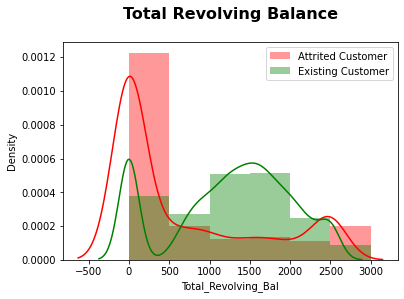

In [17]:
# Total_Revolving_Bal
plt.figure()
sns.distplot(bankchurn.Total_Revolving_Bal[bankchurn.Attrition_Flag == 'Attrited Customer'], bins = [0, 500, 1000, 1500, 2000, 2500, 3000], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Total_Revolving_Bal[bankchurn.Attrition_Flag == 'Existing Customer'], bins = [0, 500, 1000, 1500, 2000, 2500, 3000], color = 'g', label = 'Existing Customer')
plt.title('Total Revolving Balance\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



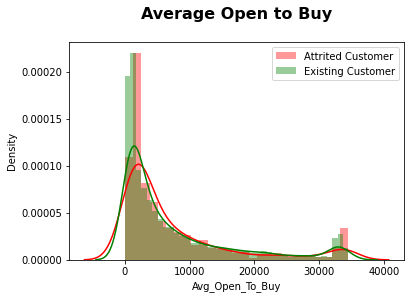

In [18]:
# Avg_Open_To_Buy
plt.figure()
sns.distplot(bankchurn.Avg_Open_To_Buy[bankchurn.Attrition_Flag == 'Attrited Customer'], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Avg_Open_To_Buy[bankchurn.Attrition_Flag == 'Existing Customer'], color = 'g', label = 'Existing Customer')
plt.title('Average Open to Buy\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



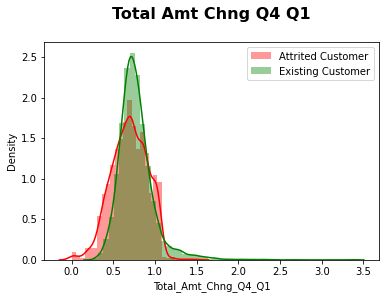

In [19]:
# Total_Amt_Chng_Q4_Q1
plt.figure()
sns.distplot(bankchurn.Total_Amt_Chng_Q4_Q1[bankchurn.Attrition_Flag == 'Attrited Customer'], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Total_Amt_Chng_Q4_Q1[bankchurn.Attrition_Flag == 'Existing Customer'], color = 'g', label = 'Existing Customer')
plt.title('Total Amt Chng Q4 Q1\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



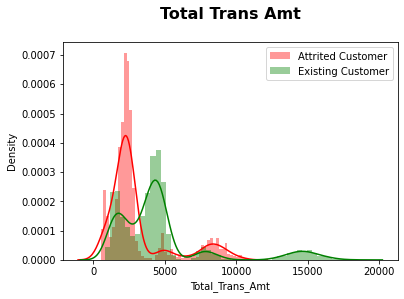

In [20]:
# Total_Trans_Amt
plt.figure()
sns.distplot(bankchurn.Total_Trans_Amt[bankchurn.Attrition_Flag == 'Attrited Customer'], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Total_Trans_Amt[bankchurn.Attrition_Flag == 'Existing Customer'], color = 'g', label = 'Existing Customer')
plt.title('Total Trans Amt\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



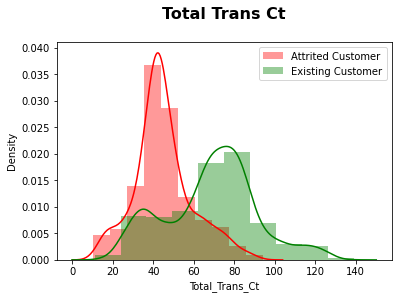

In [21]:
# Total_Trans_Ct
plt.figure()
sns.distplot(bankchurn.Total_Trans_Ct[bankchurn.Attrition_Flag == 'Attrited Customer'], bins = 10, color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Total_Trans_Ct[bankchurn.Attrition_Flag == 'Existing Customer'], bins = 10, color = 'g', label = 'Existing Customer')
plt.title('Total Trans Ct\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



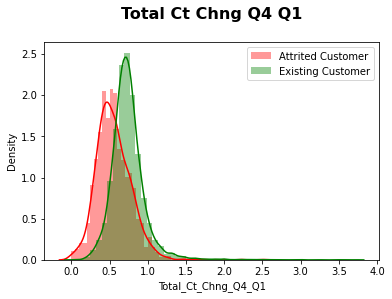

In [22]:
# Total_Ct_Chng_Q4_Q1
plt.figure()
sns.distplot(bankchurn.Total_Ct_Chng_Q4_Q1[bankchurn.Attrition_Flag == 'Attrited Customer'], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Total_Ct_Chng_Q4_Q1[bankchurn.Attrition_Flag == 'Existing Customer'], color = 'g', label = 'Existing Customer')
plt.title('Total Ct Chng Q4 Q1\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



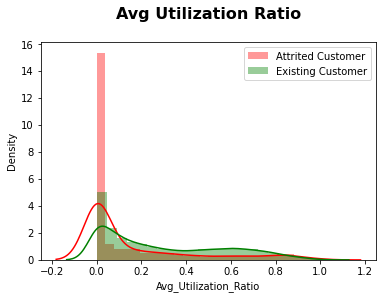

In [23]:
# Avg_Utilization_Ratio
plt.figure()
sns.distplot(bankchurn.Avg_Utilization_Ratio[bankchurn.Attrition_Flag == 'Attrited Customer'], color = 'r', label = 'Attrited Customer')
sns.distplot(bankchurn.Avg_Utilization_Ratio[bankchurn.Attrition_Flag == 'Existing Customer'], color = 'g', label = 'Existing Customer')
plt.title('Avg Utilization Ratio\n', fontsize = 16, fontweight = 'semibold')
plt.legend()
plt.show()

## **Categorical Variables**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

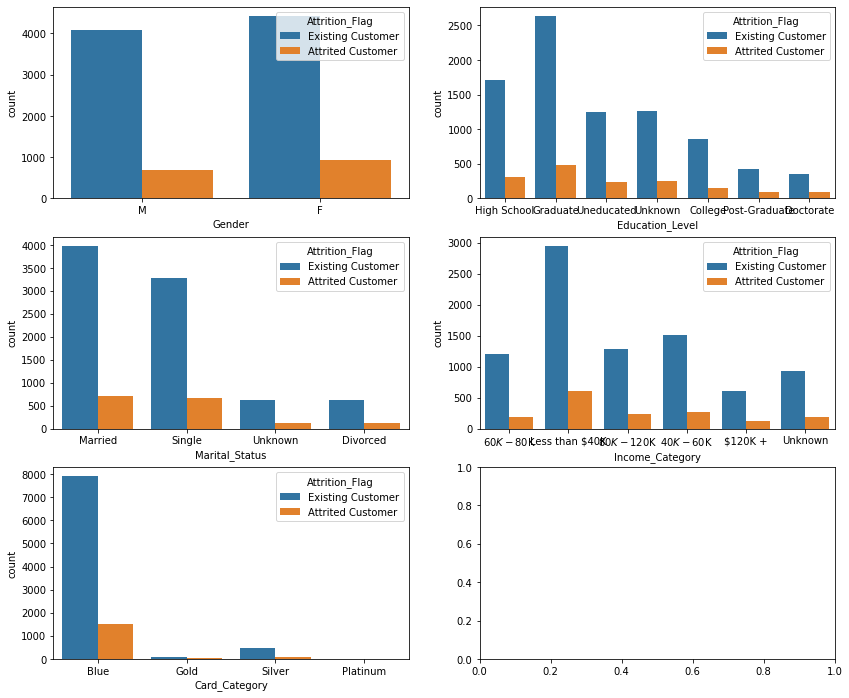

In [24]:
cat_var = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
fig, axes = plt.subplots(3, 2, figsize = (14, 12))
for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(cat, data = bankchurn, hue = 'Attrition_Flag', ax = ax)

### **Gender**

In [25]:
fig = px.pie(bankchurn, names = 'Gender', title = "Percentage of Customer's Gender", hole = 0.5)
fig.update_traces(textposition = 'inside', textinfo = 'percent + label')
fig.show()

### **Education Level**

In [26]:
proportion_education = bankchurn['Education_Level'].value_counts()
proportion_education = pd.DataFrame(proportion_education)
proportion_education = proportion_education.rename(columns={'Education_Level':'Count'})
proportion_education = proportion_education.rename_axis('Education_Level').reset_index()
proportion_education

,Education_Level,Count
0,Graduate,3128
1,High School,2013
2,Unknown,1519
3,Uneducated,1487
4,College,1013
5,Post-Graduate,516
6,Doctorate,451


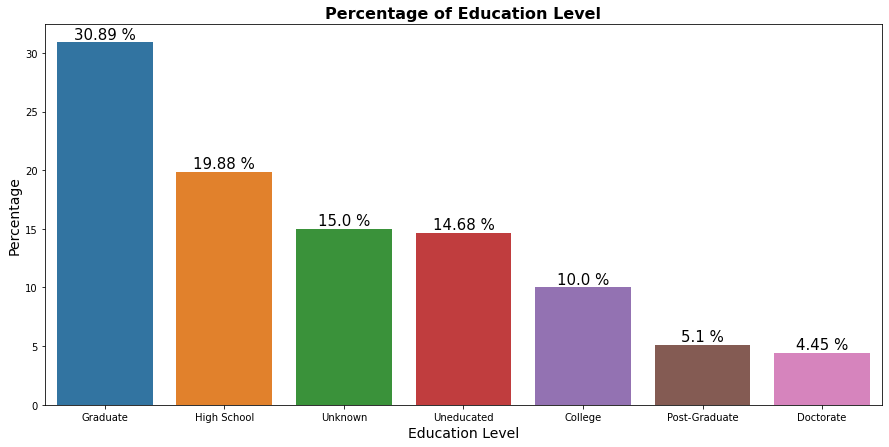

In [27]:
# Education_Level
# Show the proportion of education in bar chart
plt.figure(figsize = (15, 7))

percentage = []
for i in proportion_education['Count']:
  pct = (i / proportion_education['Count'].sum()) * 100
  percentage.append(round(pct, 2))
proportion_education['Percentage'] = percentage

## Show the plot
plots = sns.barplot(x = "Education_Level",
                    y = "Percentage",
                    data = proportion_education)

## Show the annotation
for p in plots.patches:
  plots.annotate('{} %'.format(p.get_height().astype('float')),
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center',
                 size=15, xytext=(0, 8),
                 textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Education Level", size=14)
# Setting the label for y-axis
plt.ylabel("Percentage", size=14)
# Setting the title for the graph
plt.title("Percentage of Education Level", size = 16, weight = 'semibold')
# Fianlly showing the plot
plt.show()

### **Marital Status**

In [28]:
proportion_marital_status = bankchurn['Marital_Status'].value_counts()
proportion_marital_status = pd.DataFrame(proportion_marital_status)
proportion_marital_status = proportion_marital_status.rename(columns={'Marital_Status':'Count'})
proportion_marital_status = proportion_marital_status.rename_axis('Marital_Status').reset_index()
proportion_marital_status

,Marital_Status,Count
0,Married,4687
1,Single,3943
2,Unknown,749
3,Divorced,748


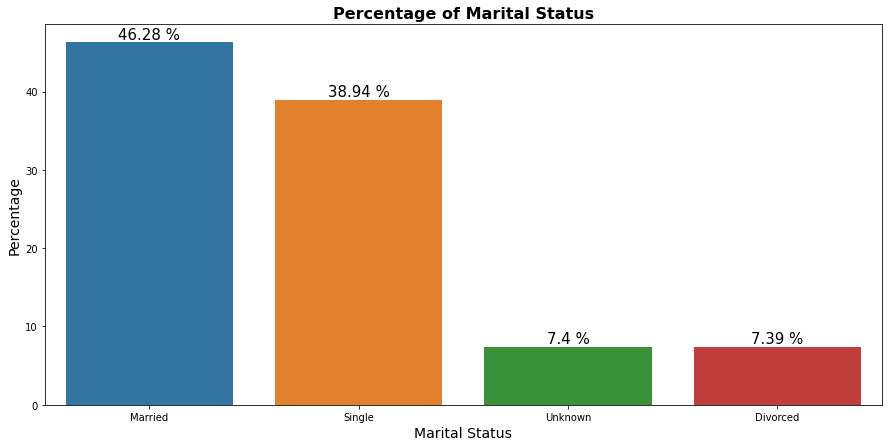

In [29]:
# Show the proportion of education in bar chart
plt.figure(figsize = (15, 7))

percentage = []
for i in proportion_marital_status['Count']:
  pct = (i / proportion_marital_status['Count'].sum()) * 100
  percentage.append(round(pct, 2))
proportion_marital_status['Percentage'] = percentage

## Show the plot
plots = sns.barplot(x = "Marital_Status",
                    y = "Percentage",
                    data = proportion_marital_status)

## Show the annotation
for p in plots.patches:
  plots.annotate('{} %'.format(p.get_height().astype('float')),
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center',
                 size=15, xytext=(0, 8),
                 textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Marital Status", size=14)
# Setting the label for y-axis
plt.ylabel("Percentage", size=14)
# Setting the title for the graph
plt.title("Percentage of Marital Status", size = 16, weight = 'semibold')
# Fianlly showing the plot
plt.show()

### **Income Category**

In [30]:
proportion_income_category = bankchurn['Income_Category'].value_counts()
proportion_income_category = pd.DataFrame(proportion_income_category)
proportion_income_category = proportion_income_category.rename(columns={'Income_Category':'Count'})
proportion_income_category = proportion_income_category.rename_axis('Income_Category').reset_index()
proportion_income_category

,Income_Category,Count
0,Less than $40K,3561
1,$40K - $60K,1790
2,$80K - $120K,1535
3,$60K - $80K,1402
4,Unknown,1112
5,$120K +,727


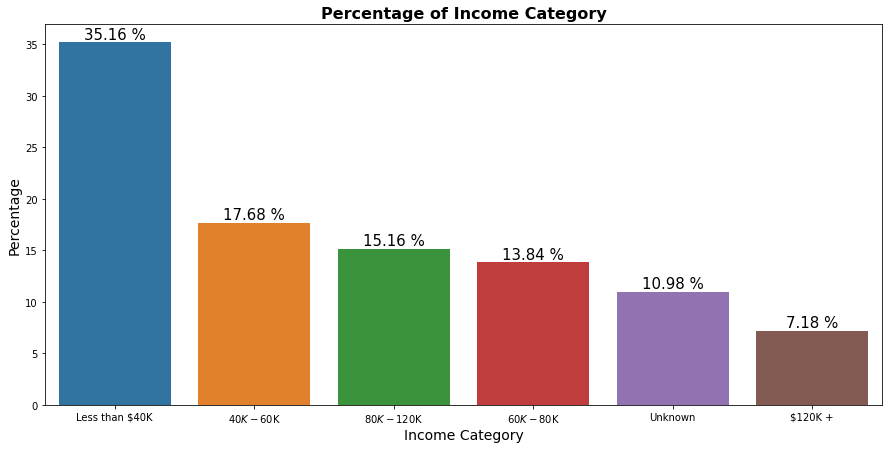

In [31]:
# Show the proportion of education in bar chart
plt.figure(figsize = (15, 7))

percentage = []
for i in proportion_income_category['Count']:
  pct = (i / proportion_income_category['Count'].sum()) * 100
  percentage.append(round(pct, 2))
proportion_income_category['Percentage'] = percentage

## Show the plot
plots = sns.barplot(x = "Income_Category",
                    y = "Percentage",
                    data = proportion_income_category)

## Show the annotation
for p in plots.patches:
  plots.annotate('{} %'.format(p.get_height().astype('float')),
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center',
                 size=15, xytext=(0, 8),
                 textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Income Category", size=14)
# Setting the label for y-axis
plt.ylabel("Percentage", size=14)
# Setting the title for the graph
plt.title("Percentage of Income Category", size = 16, weight = 'semibold')
# Fianlly showing the plot
plt.show()

### **Card Category**

In [32]:
proportion_card_category = bankchurn['Card_Category'].value_counts()
proportion_card_category = pd.DataFrame(proportion_card_category)
proportion_card_category = proportion_card_category.rename(columns={'Card_Category':'Count'})
proportion_card_category = proportion_card_category.rename_axis('Card_Category').reset_index()
proportion_card_category

,Card_Category,Count
0,Blue,9436
1,Silver,555
2,Gold,116
3,Platinum,20


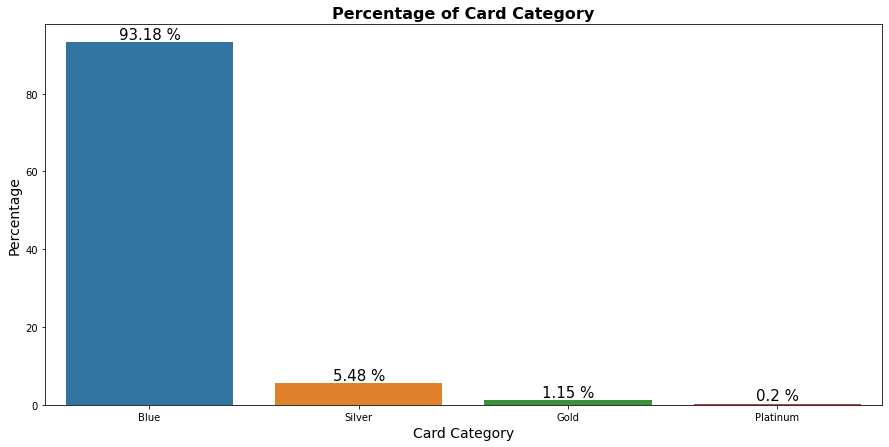

In [33]:
# Show the proportion of education in bar chart
plt.figure(figsize = (15, 7))

percentage = []
for i in proportion_card_category['Count']:
  pct = (i / proportion_card_category['Count'].sum()) * 100
  percentage.append(round(pct, 2))
proportion_card_category['Percentage'] = percentage

## Show the plot
plots = sns.barplot(x = "Card_Category",
                    y = "Percentage",
                    data = proportion_card_category)

## Show the annotation
for p in plots.patches:
  plots.annotate('{} %'.format(p.get_height().astype('float')),
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center',
                 size=15, xytext=(0, 8),
                 textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Card Category", size=14)
# Setting the label for y-axis
plt.ylabel("Percentage", size=14)
# Setting the title for the graph
plt.title("Percentage of Card Category", size = 16, weight = 'semibold')
# Fianlly showing the plot
plt.show()

## **Checking Correlation**

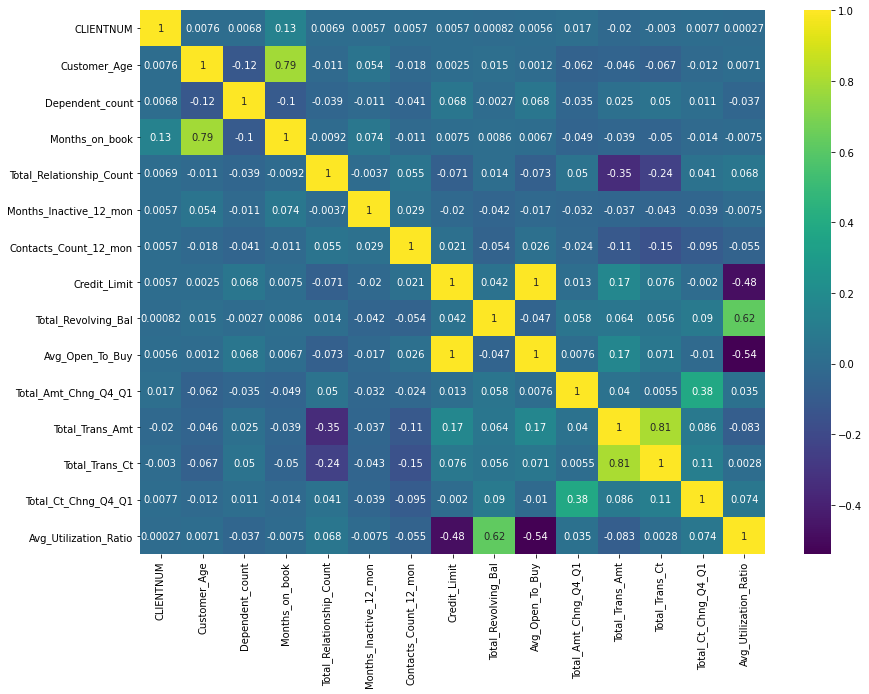

In [34]:
dfk = bankchurn.select_dtypes(include = ['int64', 'float64']) # memilih kolom numerik
k = len(dfk.columns)
cm = dfk.corr()
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot = True, cmap = 'viridis')

## **Normality Test**

In [35]:
numeric_uji = bankchurn[['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
                        'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
                        'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']].sample(n = 50, random_state = 21)
numeric_uji.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7061,48,5,36,4,1,2,4100.0,1956,2144.0,0.617,3584,61,0.743,0.477
9075,51,3,37,1,2,1,34516.0,0,34516.0,0.814,8736,97,0.702,0.000
7608,40,2,27,6,3,1,8494.0,2023,6471.0,0.871,4486,77,0.974,0.238
1384,46,4,36,3,3,4,1438.3,981,457.3,0.663,1114,33,0.650,0.682
6871,43,3,32,6,3,3,1897.0,0,1897.0,0.645,2866,47,0.469,0.000


In [36]:
nilai_statistik = list()
p_value = list()
hasil = list()
for i in numeric_uji:
    ns, pv = stats.shapiro(numeric_uji[i])
    hsl = 'normal' if pv > .05 else 'tidak normal'
    nilai_statistik.append(ns)
    p_value.append(pv)
    hasil.append(hsl)

uji = pd.DataFrame(nilai_statistik, index = numeric_uji.columns, columns = ['nilai statistik'])
uji['p-value'] = p_value
uji['sig lvl'] = 0.05
uji['hasil uji'] = hasil
uji

,nilai statistik,p-value,sig lvl,hasil uji
Customer_Age,0.960317,9.165532e-02,0.05,normal
Dependent_count,0.921909,2.765903e-03,0.05,tidak normal
Months_on_book,0.957837,7.215334e-02,0.05,normal
Total_Relationship_Count,0.922994,3.030233e-03,0.05,tidak normal
Months_Inactive_12_mon,0.796414,7.256186e-07,0.05,tidak normal
Contacts_Count_12_mon,0.924277,3.377850e-03,0.05,tidak normal
Credit_Limit,0.740214,4.706309e-08,0.05,tidak normal
Total_Revolving_Bal,0.892568,2.755597e-04,0.05,tidak normal
Avg_Open_To_Buy,0.743039,5.350601e-08,0.05,tidak normal
Total_Amt_Chng_Q4_Q1,0.898228,4.201453e-04,0.05,tidak normal


# **Data Preprocessing**

## **Feature Scalling**

In [37]:
standarisasi = StandardScaler()
normalisasi = MinMaxScaler()
for stand in bankchurn[['Customer_Age', 'Months_on_book', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']]:
    bankchurn[stand] = standarisasi.fit_transform(bankchurn[stand].values.reshape(len(bankchurn), 1))
for norm in bankchurn[['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
                       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
                       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']]:
    bankchurn[norm] = normalisasi.fit_transform(bankchurn[norm].values.reshape(len(bankchurn), 1))

In [38]:
bankchurn.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,1.012700e+04,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,1.012700e+04,1.012700e+04,10127.000000
mean,7.391776e+08,3.127744e-17,0.469241,-5.687166e-16,0.562516,0.390195,0.409220,0.217477,0.461984,0.216328,0.223709,0.216651,1.194179e-14,-1.100466e-16,0.275169
std,3.690378e+07,1.000049e+00,0.259782,1.000049e+00,0.310882,0.168437,0.184371,0.274771,0.323793,0.263399,0.064530,0.189002,1.000049e+00,1.000049e+00,0.275967
min,7.080821e+08,-2.535541e+00,0.000000,-2.871068e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.337256e+00,-2.991597e+00,0.000000
25%,7.130368e+08,-6.643815e-01,0.200000,-6.171294e-01,0.400000,0.333333,0.333333,0.033760,0.142630,0.038290,0.185752,0.091549,-8.460801e-01,-5.469820e-01,0.023023
50%,7.179264e+08,-4.066159e-02,0.400000,8.964513e-03,0.600000,0.333333,0.333333,0.094042,0.506953,0.100571,0.216662,0.188550,9.123036e-02,-4.293775e-02,0.176176
75%,7.731435e+08,7.078024e-01,0.600000,5.098397e-01,0.800000,0.500000,0.500000,0.291109,0.708780,0.285574,0.252870,0.235396,6.877007e-01,4.443050e-01,0.503504
max,8.283431e+08,3.327426e+00,1.000000,2.513340e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.158792e+00,1.260857e+01,1.000000


## **Label Encoding**

In [39]:
LE = LabelEncoder()
for cat in list(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']):
    bankchurn[cat] = LE.fit_transform(bankchurn[cat])

bankchurn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,-0.165406,1,0.6,3,1,2,0,0.384621,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,-0.973895,3.834003,0.061061
1,818770008,1,0.333570,0,1.0,2,2,4,0,1.010715,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,-1.357340,12.608573,0.105105
2,713982108,1,0.583058,1,0.6,2,1,3,0,0.008965,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,-1.911206,6.807864,0.000000
3,769911858,1,-0.789126,0,0.8,3,3,4,0,-0.241473,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.036775,-1.911206,6.807864,0.760761
4,709106358,1,-0.789126,1,0.6,5,1,2,0,-1.869317,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.017025,-1.570365,7.509325,0.000000


## **Train Test Split**

In [40]:
X = bankchurn.drop(['CLIENTNUM', 'Attrition_Flag'], axis = 1).astype(float).values
y = bankchurn['Attrition_Flag'].astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## **Imbalanced Dataset**

In [41]:
smote = SMOTE(random_state = 0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [42]:
print('Before SMOTE')
print(pd.DataFrame(y_train).value_counts())
print('After SMOTE')
print(pd.DataFrame(y_resampled).value_counts())

Before SMOTE
1.0    6801
0.0    1300
dtype: int64
After SMOTE
1.0    6801
0.0    6801
dtype: int64


# **Machine Learning Modelling**

## **Random Forest Classifier**

In [50]:
# Train the model
rdf_model = RandomForestClassifier().fit(X_resampled, y_resampled)
print('Model Random Forest Classifier yang terbentuk adalah:\n', rdf_model)

Model Random Forest Classifier yang terbentuk adalah:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


**Training**

In [51]:
# Predict
y_train_pred = rdf_model.predict(X_resampled)

# Classification report
print('Classification Report Training Model (Random Forest):')
print(classification_report(y_resampled, y_train_pred))

Classification Report Training Model (Random Forest):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6801
         1.0       1.00      1.00      1.00      6801

    accuracy                           1.00     13602
   macro avg       1.00      1.00      1.00     13602
weighted avg       1.00      1.00      1.00     13602



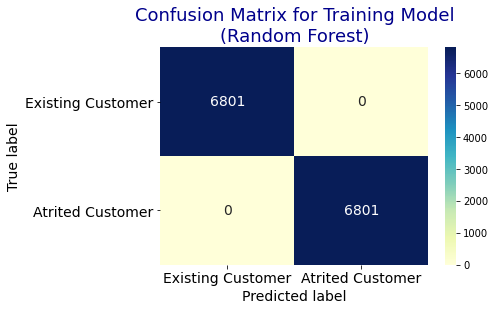

In [52]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_resampled, y_train_pred)), ('Existing Customer', 'Atrited Customer'), ('Existing Customer', 'Atrited Customer'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {'size' : 14}, fmt = 'd', cmap = 'YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'center', fontsize = 14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label',fontsize = 14)
plt.show()

**Testing**

In [53]:
# Predict
y_test_pred = rdf_model.predict(X_test)

# Classification report
print('Classification Report Testing Model (Random Forest):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest):
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86       327
         1.0       0.97      0.97      0.97      1699

    accuracy                           0.96      2026
   macro avg       0.92      0.92      0.92      2026
weighted avg       0.96      0.96      0.96      2026



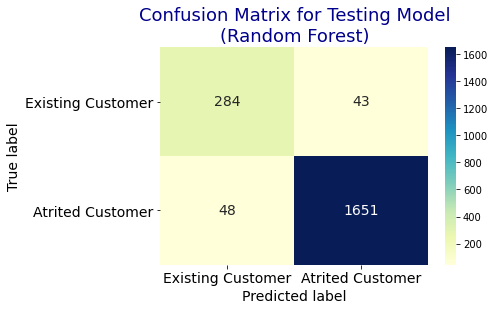

In [54]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('Existing Customer', 'Atrited Customer'), ('Existing Customer', 'Atrited Customer'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {'size' : 14}, fmt = 'd', cmap = 'YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'center', fontsize = 14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label',fontsize = 14)
plt.show()

## **Logistic Regression**

In [43]:
# Train the model
log_model = LogisticRegression().fit(X_resampled, y_resampled)
print('Model Logistic Regression yang terbentuk adalah:\n', log_model)

Model Logistic Regression yang terbentuk adalah:
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**Training**

In [44]:
# Predict
y_train_pred = log_model.predict(X_resampled)

# Classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_resampled, y_train_pred))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      6801
         1.0       0.87      0.85      0.86      6801

    accuracy                           0.86     13602
   macro avg       0.86      0.86      0.86     13602
weighted avg       0.86      0.86      0.86     13602



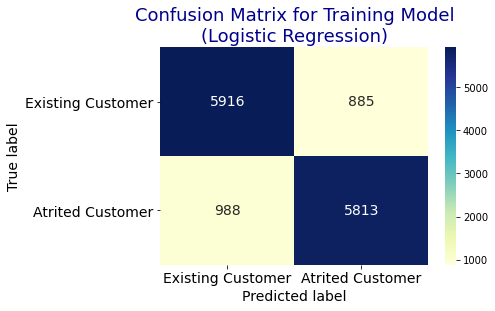

In [46]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_resampled, y_train_pred)), ('Existing Customer', 'Atrited Customer'), ('Existing Customer', 'Atrited Customer'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {'size' : 14}, fmt = 'd', cmap = 'YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'center', fontsize = 14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label',fontsize = 14)
plt.show()

**Testing**

In [47]:
# Predict
y_test_pred = log_model.predict(X_test)

# Classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.54      0.83      0.65       327
         1.0       0.96      0.86      0.91      1699

    accuracy                           0.86      2026
   macro avg       0.75      0.85      0.78      2026
weighted avg       0.89      0.86      0.87      2026



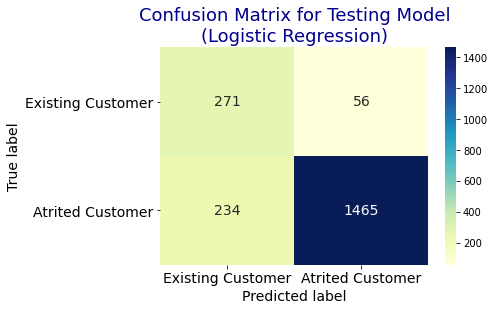

In [49]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('Existing Customer', 'Atrited Customer'), ('Existing Customer', 'Atrited Customer'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {'size' : 14}, fmt = 'd', cmap = 'YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'center', fontsize = 14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label',fontsize = 14)
plt.show()

## **Gradient Boosting Classifier**

In [55]:
#Train the model
gbt_model = GradientBoostingClassifier().fit(X_resampled, y_resampled)
print(gbt_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


**Training**

In [56]:
# Predict
y_train_pred = gbt_model.predict(X_resampled)

# Classification report
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_resampled, y_train_pred))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      6801
         1.0       0.98      0.98      0.98      6801

    accuracy                           0.98     13602
   macro avg       0.98      0.98      0.98     13602
weighted avg       0.98      0.98      0.98     13602



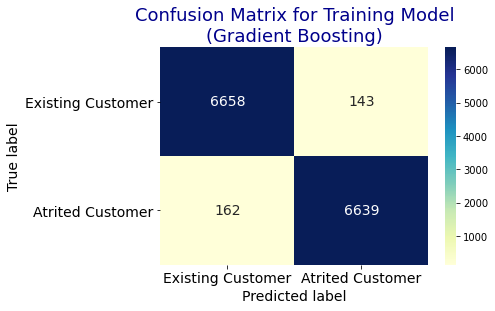

In [57]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_resampled, y_train_pred)), ('Existing Customer', 'Atrited Customer'), ('Existing Customer', 'Atrited Customer'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {'size' : 14}, fmt = 'd', cmap = 'YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'center', fontsize = 14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label',fontsize = 14)
plt.show()

**Testing**

In [58]:
# Predict
y_test_pred = gbt_model.predict(X_test)

# Classification report
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       327
         1.0       0.98      0.97      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.92      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026



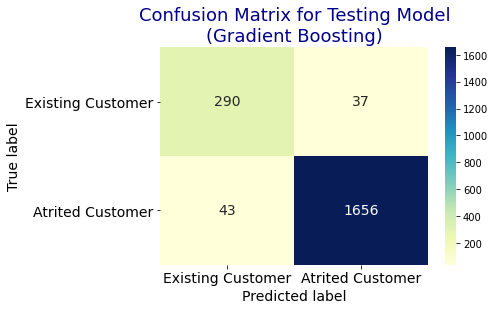

In [59]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('Existing Customer', 'Atrited Customer'), ('Existing Customer', 'Atrited Customer'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {'size' : 14}, fmt = 'd', cmap = 'YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'center', fontsize = 14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label',fontsize = 14)
plt.show()

# **Model Evaluation**

## **Random Forest Classifier**

Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar **100%**, dengan detail:

* Tebakan `churn` yang sebenernya `benar churn` adalah 6801.
* Tebakan `tidak churn` yang sebenernya `tidak churn` adalah 6801.
* Tebakan `tidak churn` yang sebenernya `benar churn` adalah 0.
* Tebakan `churn` yang sebenernya `tidak churn` adalah 0.

Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar **96%**, dengan detil:
* Tebakan `churn` yang sebenernya `benar churn` adalah 1651.
* Tebakan `tidak churn` yang sebenernya `tidak churn` adalah 284.
* Tebakan `tidak churn` yang sebenernya `benar churn` adalah 48.
* Tebakan `churn` yang sebenernya `tidak churn` adalah 43.

## **Logistic Regression**

Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar **86%**, dengan detail:

* Tebakan `churn` yang sebenernya `benar churn` adalah 5813.
* Tebakan `tidak churn` yang sebenernya `tidak churn` adalah 5916.
* Tebakan `tidak churn` yang sebenernya `benar churn` adalah 988.
* Tebakan `churn` yang sebenernya `tidak churn` adalah 885.

Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar **86%**, dengan detil:
* Tebakan `churn` yang sebenernya `benar churn` adalah 1465.
* Tebakan `tidak churn` yang sebenernya `tidak churn` adalah 271.
* Tebakan `tidak churn` yang sebenernya `benar churn` adalah 234.
* Tebakan `churn` yang sebenernya `tidak churn` adalah 56.

## **Gradient Boosting Classifier**

Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar **98%**, dengan detail:

* Tebakan `churn` yang sebenernya `benar churn` adalah 6639.
* Tebakan `tidak churn` yang sebenernya `tidak churn` adalah 6658.
* Tebakan `tidak churn` yang sebenernya `benar churn` adalah 162.
* Tebakan `churn` yang sebenernya `tidak churn` adalah 143.

Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar **96%**, dengan detil:
* Tebakan `churn` yang sebenernya `benar churn` adalah 1656.
* Tebakan `tidak churn` yang sebenernya `tidak churn` adalah 290.
* Tebakan `tidak churn` yang sebenernya `benar churn` adalah 43.
* Tebakan `churn` yang sebenernya `tidak churn` adalah 37.